# 2NV PRUEBA TECNICA BIG DATA


## CASO DE NEGOCIO 1

La ciudad de nueva york ha visto un aumento en la cantidad de accidentes en las carreteras de la ciudad les gustaría saber si el número de accidentes ha aumentado en las últimas semanas. para todos los accidentes informados, recopilaron detalles de cada accidente y mantuvieron registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

Ahora se han acercado solicitando algunas visualizaciones que les permita identificar los patrones en los accidentes, para así tomar medidaspreventivas para reducir la cantidad de accidentes en
el futuro.

Se entrega un archivo csv que contiene detalles sobre cada Accidente. El delimitador en el archivo csv es `;` en lugar del
Predeterminado `,`.

### 1. Lee el csv y calcula el total de heridos y muertos por cada accidente

In [120]:
# importa el archivo csv y muestra su contenido, primero el archivo es cargado en la ruta  http://localhost:8888/tree
import pandas as pd
df = pd.read_csv('accidents.csv', sep=';', engine='python')
#df

In [5]:
# obtener algunos datos importantes segun los datos importados
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,238452.000000,231544.000000,231544.000000,238522.000000,238522.000000,238522.000000,238522.000000,238522.000000,238522.000000,2.385220e+05
mean,10865.578838,40.656873,-73.797699,0.054523,0.000532,0.023482,0.000084,0.178076,0.000310,4.008044e+06
std,546.056571,1.632850,2.961521,0.237834,0.023250,0.152835,0.009157,0.587479,0.017848,1.084693e+05
min,10000.000000,0.000000,-74.253930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.511951e+06
25%,10452.000000,40.666750,-73.973860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.913739e+06
50%,11208.000000,40.717007,-73.922770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.006476e+06
75%,11354.000000,40.765715,-73.864890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.102648e+06
max,11697.000000,40.912884,0.000000,6.000000,2.000000,3.000000,1.000000,21.000000,2.000000,4.195347e+06


In [9]:
# Se desea conocer La informacion que pueda ser significativa para nuestro analisis
# Informacion general de los datos de cada cloumna saber el numero de datos No Nulos por columna (valores validos)
# y el Tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null  int64  
 12  NUMBER OF MOTORIST KILLED     

In [182]:
# Calculo del total las personas heridas (peatones, ciclistas y automovilistas) 
df['TOTALLY INJURED'] = df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF MOTORIST INJURED']

In [183]:
# Muestra el calculo de las personas heridas (peatones, ciclistas y automovilistas)
df[['NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED','TOTALLY INJURED']]

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,TOTALLY INJURED
0,0,0,0,0
1,1,0,0,1
2,0,0,0,0
3,0,1,0,1
4,0,0,1,1
...,...,...,...,...
238517,0,0,0,0
238518,0,0,0,0
238519,0,0,0,0
238520,0,0,2,2


In [184]:
# Calculo de las personas fallecidas
df['TOTALLY KILLED']=df['NUMBER OF PEDESTRIANS KILLED'] + df['NUMBER OF CYCLIST KILLED'] + df['NUMBER OF MOTORIST KILLED']

In [16]:
# Muestra el calculo de las personas fallecidas
df[['NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED','TOTALLY KILLED']]

,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED,TOTALLY KILLED
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
238517,0,0,0,0
238518,0,0,0,0
238519,0,0,0,0
238520,0,0,0,0


In [32]:
# Obtenemos el total de personas heridas (61081): 13005 (PEDESTRIANS), 5601(CYCLIST), 42475(MOTORIST)
df['NUMBER OF PEDESTRIANS INJURED'].sum() + df['NUMBER OF CYCLIST INJURED'].sum() + df['NUMBER OF MOTORIST INJURED'].sum()

61081

In [33]:
# Obtenemos el total de personas fallecidas (221): 127 (PEDESTRIANS), 20(CYCLIST), 74(MOTORIST)
df['NUMBER OF PEDESTRIANS KILLED'].sum() + df['NUMBER OF CYCLIST KILLED'].sum() + df['NUMBER OF MOTORIST KILLED'].sum()

221

### 2. El archivo actualizado se debe escribir como un archivo json

In [36]:
# Se crea una pivot table agrupando los datos por las columnas 'BOROUGH','ON STREET NAME','DATE'
import requests
import numpy as np
pivoted_m = pd.pivot_table(df,index=['DATE','BOROUGH'], aggfunc=np.sum)

In [133]:
# El archivo se genera y es almacenado en la ruta http://localhost:8888/tree
# pivoted_m.to_json('Accidents.json')  df['TOTALLY KILLED']
pivoted_m.to_json("Accidents.json")

### 3. Lee el archivo json y visualiza los datos que consideres mas relevantes

In [8]:
import pandas as pd
datos = pd.read_json("Accidents.json")

In [12]:
# Borramos los indices con los que fueron agrupados en la pivot table
datos = datos.reset_index()

In [13]:
# Obtenemos un dataframe sin los indices
df1= pd.DataFrame(datos)

In [14]:
#En df 2 analizamos la informacion para luego comparar si es correcta
df2=df1

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_0                        3005 non-null   int64  
 1   index                          3005 non-null   object 
 2   COLLISION_ID                   3005 non-null   int64  
 3   LATITUDE                       3005 non-null   float64
 4   LONGITUDE                      3005 non-null   float64
 5   NUMBER OF CYCLIST INJURED      3005 non-null   int64  
 6   NUMBER OF CYCLIST KILLED       3005 non-null   int64  
 7   NUMBER OF MOTORIST INJURED     3005 non-null   int64  
 8   NUMBER OF MOTORIST KILLED      3005 non-null   int64  
 9   NUMBER OF PEDESTRIANS INJURED  3005 non-null   int64  
 10  NUMBER OF PEDESTRIANS KILLED   3005 non-null   int64  
 11  TOTALLY INJURED                3005 non-null   int64  
 12  TOTALLY KILLED                 3005 non-null   i

In [16]:
# Separamos las tuplas de los indices
df2[['DATE', 'CITY']] = df2['index'].str.split(pat = ',', n = 1, expand = True)

In [18]:
#  Limpiamos los datos de dataframe 2 
df2["CITY"] = df2["CITY"].str.replace("[),']","")
df2["DATE"] = df2["DATE"].str.replace("[(,']","")

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_48984\2329782544.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["CITY"] = df2["CITY"].str.replace("[),']","")
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_48984\2329782544.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["DATE"] = df2["DATE"].str.replace("[(,']","")


In [20]:
# Renombramos las columnas 
df2 = df2.rename(columns={
	"NUMBER OF CYCLIST INJURED":"CYC_INJURED",
	"NUMBER OF CYCLIST KILLED":"CYC_KILLED",	
	"NUMBER OF MOTORIST INJURED":"MOTOR_INJURED",
	"NUMBER OF MOTORIST KILLED":"MOTOR_KILLED",
	"NUMBER OF PEDESTRIANS INJURED":"PED_INJURED",	
	"NUMBER OF PEDESTRIANS KILLED":"PED_KILLED",
	"TOTALLY INJURED":"TOT_INJURED",
	"TOTALLY KILLED":"TOT_KILLED"
})


In [109]:
# Analizamos los datos en un nuevo dataframe 
df_analisys = df2

In [111]:
df_analisys.count()

level_0          3005
index            3005
COLLISION_ID     3005
LATITUDE         3005
LONGITUDE        3005
CYC_INJURED      3005
CYC_KILLED       3005
MOTOR_INJURED    3005
MOTOR_KILLED     3005
PED_INJURED      3005
PED_KILLED       3005
TOT_INJURED      3005
TOT_KILLED       3005
ZIP CODE         3005
DATE             3005
CITY             3005
dtype: int64

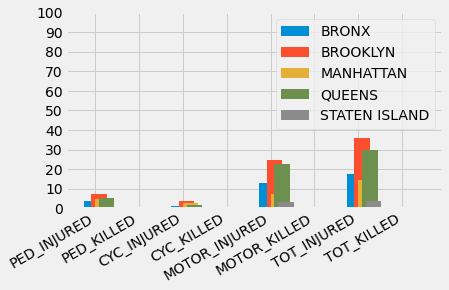

In [131]:
# Analizamos los datos por ciudad promedio de accidentes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
accidentstype = ['PED_INJURED','PED_KILLED','CYC_INJURED','CYC_KILLED','MOTOR_INJURED','MOTOR_KILLED','TOT_INJURED','TOT_KILLED']
dataset = df_analisys.groupby('CITY')[accidentstype].mean()

indx= np.arange(len(accidentstype))
score_label = np.arange(0, 110, 10)

# print(dataset.T)  BRONX   BROOKLYN   MANHATTAN   QUEENS   STATEN ISLAND
bronx = list(dataset.T[' BRONX'])
brooklyn = list(dataset.T[' BROOKLYN'])
manhattan = list(dataset.T[' MANHATTAN'])
queens = list(dataset.T[' QUEENS'])
island = list(dataset.T[' STATEN ISLAND'])

bar_width=0.35

fig, ax = plt.subplots()
barbronx = ax.bar(indx - bar_width/4, bronx, bar_width, label="BRONX")
barbrooklyn = ax.bar(indx + (bar_width/4), brooklyn, bar_width, label="BROOKLYN")
barmanhattan = ax.bar(indx + (bar_width/2), manhattan, bar_width, label="MANHATTAN")
barqueens = ax.bar(indx + (3*bar_width/4), queens, bar_width, label="QUEENS")
barisland = ax.bar(indx + bar_width, island, bar_width, label="STATEN ISLAND")
#inserting x axis labels
ax.set_xticks(indx)
ax.set_xticklabels(accidentstype)

# inserting y axis lables
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting y axis legend
ax.legend()

fig.autofmt_xdate()
plt.show()

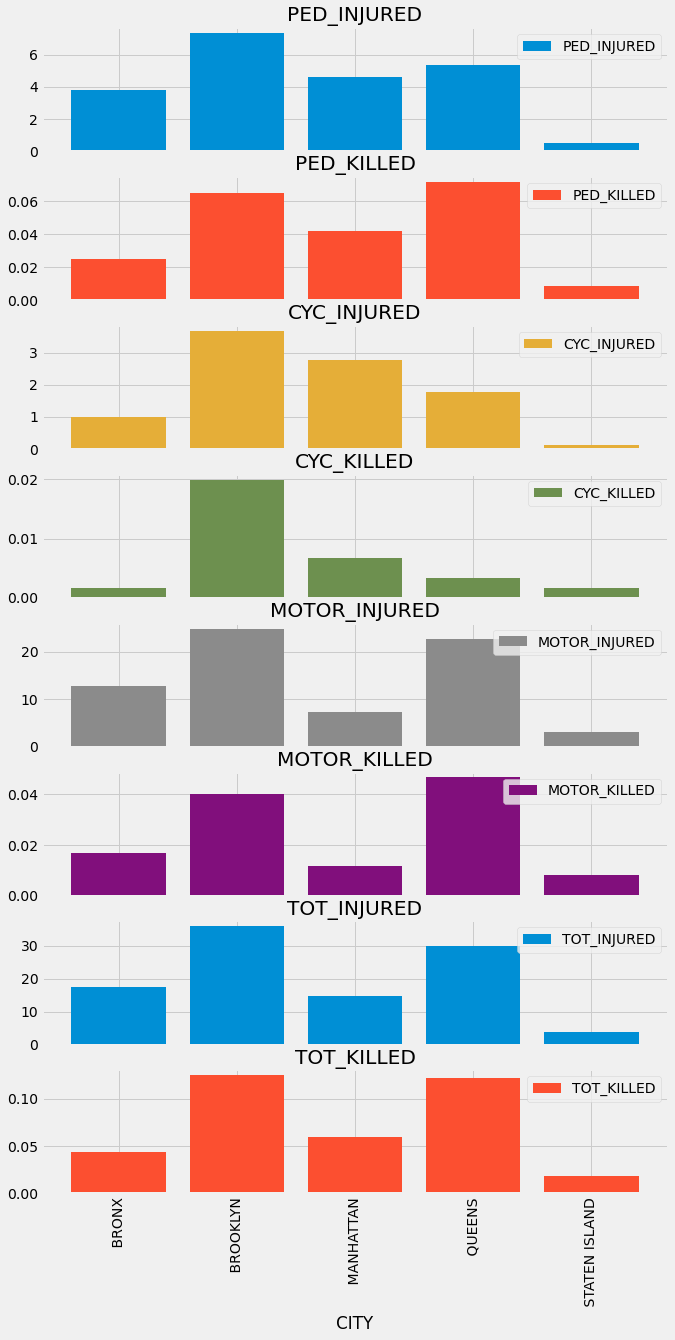

In [112]:
# Analizamos los datos por ciudad y por tipo de accidente 
dataset.plot(kind = 'bar',
             width=0.8,
             subplots=True,
             figsize=(10,20));

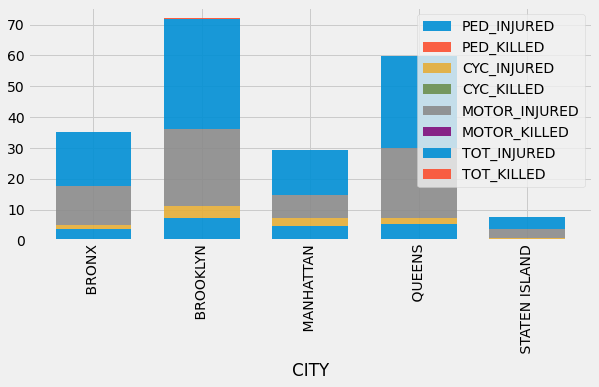

In [118]:
# Otra forma que podemos visualizar los datos
dataset.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.9,               # nivel de transparencia
             width = 0.7,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(9,4)); 


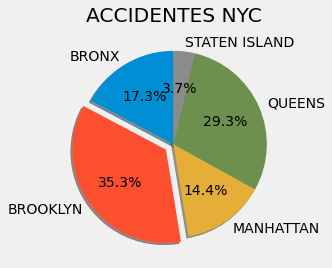

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Hallamos el total de heridos por ciudad
bronx_pie = df2[df2['CITY'] ==' BRONX' ]['TOT_INJURED'].sum()
brook_pie = df2[df2['CITY'] ==' BROOKLYN' ]['TOT_INJURED'].sum()
manha_pie = df2[df2['CITY'] ==' MANHATTAN' ]['TOT_INJURED'].sum()
queen_pie = df2[df2['CITY'] ==' QUEENS' ]['TOT_INJURED'].sum()
islan_pie = df2[df2['CITY'] ==' STATEN ISLAND' ]['TOT_INJURED'].sum()

heridos = [bronx_pie,brook_pie,manha_pie,queen_pie,islan_pie]
ciudades = ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']
explode = [0, 0.1, 0, 0, 0] 

plt.pie(heridos, labels=ciudades, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('ACCIDENTES NYC')
plt.show()

### 4. Obten los datos sobre la población y el área de cada distrito de la página de wikipedia: https://en.wikipedia.org/wiki/boroughs_of_new_york_city

In [251]:
# Importamos la data a traves del la funcion read_html
import pandas as pd
df4= pd.read_html('https://en.wikipedia.org/wiki/Template:NYC_boroughs', parse_dates=True, header=2)
df4 = df4[0]

In [321]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Borough             8 non-null      object
 1   County              8 non-null      object
 2   Census (2020)       8 non-null      object
 3   billions(2012 US$)  8 non-null      object
 4   square miles        8 non-null      object
 5   squarekm            8 non-null      object
 6   persons/mi2         8 non-null      object
 7   persons/km2         8 non-null      object
 8   Unnamed: 8          1 non-null      object
dtypes: object(9)
memory usage: 704.0+ bytes


In [327]:
concatenated = pd.concat([df2, df4], axis="columns")

In [328]:
concatenated

,level_0,index,COLLISION_ID,LATITUDE,LONGITUDE,CYC_INJURED,CYC_KILLED,MOTOR_INJURED,MOTOR_KILLED,PED_INJURED,...,CITY,Borough,County,Census (2020),billions(2012 US$),square miles,squarekm,persons/mi2,persons/km2,Unnamed: 8
0,0,"('01/01/2018', 'BRONX')",164307745,1715.782507,-3103.338323,0,0,10,0,0,...,BRONX,The Bronx,Bronx,1472654,$ 36.938,42.2,109.3,34920,13482,NaN
1,1,"('01/01/2018', 'BROOKLYN')",417610800,4391.142032,-7985.518188,1,0,30,0,3,...,BROOKLYN,Brooklyn,Kings,2736074,$ 86.151,69.4,179.7,39438,15227,NaN
2,2,"('01/01/2018', 'MANHATTAN')",198920541,2038.353293,-3698.750223,1,0,6,0,3,...,MANHATTAN,Manhattan,New York,1694263,$ 610.386,22.7,58.8,74781,28872,NaN
3,3,"('01/01/2018', 'QUEENS')",340718228,3501.703287,-6348.938811,2,0,10,0,2,...,QUEENS,Queens,Queens,2405464,$ 82.328,108.7,281.5,22125,8542,NaN
4,4,"('01/01/2018', 'STATEN ISLAND')",30568662,324.513319,-593.191158,0,0,1,0,0,...,STATEN ISLAND,Staten Island,Richmond,495747,$ 14.270,57.5,148.9,8618,3327,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,3000,"('12/31/2018', 'BRONX')",259622643,2532.185683,-4580.607437,0,0,13,0,6,...,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,3001,"('12/31/2018', 'BROOKLYN')",527321335,5001.286186,-9095.009322,2,0,23,0,10,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002,3002,"('12/31/2018', 'MANHATTAN')",312366156,3098.497484,-5621.799861,1,0,2,0,12,...,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3003,3003,"('12/31/2018', 'QUEENS')",421796195,4112.374860,-7455.700630,0,0,17,0,19,...,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
df4. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Borough             8 non-null      object
 1   County              8 non-null      object
 2   Census (2020)       8 non-null      object
 3   billions(2012 US$)  8 non-null      object
 4   square miles        8 non-null      object
 5   squarekm            8 non-null      object
 6   persons/mi2         8 non-null      object
 7   persons/km2         8 non-null      object
 8   Unnamed: 8          1 non-null      object
dtypes: object(9)
memory usage: 704.0+ bytes


In [329]:
df4.count()

Borough               8
County                8
Census (2020)         8
billions(2012 US$)    8
square miles          8
squarekm              8
persons/mi2           8
persons/km2           8
Unnamed: 8            1
dtype: int64

In [290]:
df4

,Borough,County,Census (2020),billions(2012 US$),square miles,squarekm,persons/mi2,persons/km2,Unnamed: 8_level_0
,The Bronx,Bronx,"1,472,654",$ 36.938,42.2,109.3,"34,920","13,482",Unnamed: 8_level_1
,Brooklyn,Kings,"2,736,074",$ 86.151,69.4,179.7,"39,438","15,227",Unnamed: 8_level_2
0,Manhattan,New York,1694263,$ 610.386,22.7,58.8,74781,28872,NaN
1,Queens,Queens,2405464,$ 82.328,108.7,281.5,22125,8542,NaN
2,Staten Island,Richmond,495747,$ 14.270,57.5,148.9,8618,3327,NaN
3,City of New York,City of New York,8804190,$ 830.072,302.6,783.8,29095,11234,NaN
4,State of New York,State of New York,20215751,"$ 1,724.759",47126.4,122056.8,429,166,NaN
5,† GDP = Gross Domestic Product Sources:[1][2][...,† GDP = Gross Domestic Product Sources:[1][2][...,† GDP = Gross Domestic Product Sources:[1][2][...,† GDP = Gross Domestic Product Sources:[1][2][...,† GDP = Gross Domestic Product Sources:[1][2][...,† GDP = Gross Domestic Product Sources:[1][2][...,† GDP = Gross Domestic Product Sources:[1][2][...,† GDP = Gross Domestic Product Sources:[1][2][...,† GDP = Gross Domestic Product Sources:[1][2][...


In [88]:
dsprueba1=dataset.

In [198]:
df2['CITY'].count()

3005

In [199]:
df2['CITY'].count()

3005